In [1]:
#! pip install youtube_transcript_api
#! pip install spacy
#! pip install tqdm
#! pip install pandas

In [2]:
from youtube_transcript_api import YouTubeTranscriptApi as yta
from urllib.parse import urlparse, parse_qs
import spacy
from spacy import displacy 
from tqdm import tqdm
import pandas as pd
# import cohere
import sys

In [3]:
def get_transcript(video_id):
    try:
        transcript = yta.get_transcript(video_id)
        return transcript
    except:
        return "No transcript available"

In [4]:
def extract_id(link):
    query = urlparse(link).query
    id = parse_qs(query)["v"][0]
    return id

In [6]:
# extract video id from link
video_id = extract_id("https://www.youtube.com/watch?v=-KMZW_zwRfc")
# get transcript
transcript = get_transcript(video_id)

In [65]:
nlp = spacy.load('en_core_web_sm')

nlp_wk = spacy.load('xx_ent_wiki_sm')

In [34]:
text = ""
for line in transcript:
    text += line['text'] + " "

In [53]:
doc = nlp(text)

In [54]:
displacy.render(doc, style="ent")

In [55]:
with open("key.txt", "r") as f:
    key = f.read()

In [56]:
import openai
import os

# set up OpenAI API credentials
openai.api_key = key

# set up prompt and parameters for text generation
prompt = "From this transcript, mark all the locations visited in the format of values separated by commas: "+text+"Here are the locations:"
model = "text-davinci-003"
params = {
    "max_tokens": 500,
    "temperature": 0.3,
    "n": 3,
    "stop": "\nHere are the locations: "
}

# generate text from prompt
response = openai.Completion.create(
    engine=model,
    prompt=prompt,
    max_tokens=params["max_tokens"],
    temperature=params["temperature"],
    n=params["n"],
    stop=params["stop"]
)

# print generated text
print(response.choices[0].text.strip())

San Diego, Mexico, Pacific Ocean, Old Town, Central Business District, Gaslamp Quarter, Balboa Park, San Diego Zoo, Downtown waterfront area, Maritime Museum, Navy Pier, USS Midway, Broadway Pier, Coronado, Point Loma, Mission Beach, Pacific Beach, La Jolla, Legoland, Belmont Park, Birch Aquarium, SeaWorld.


In [64]:
doc2 = nlp(response.choices[0].text.strip())

In [69]:
# ! pip install locationtagger
import locationtagger

In [82]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nchai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nchai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\nchai\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nchai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [83]:
text_sample = str(response.choices[0].text.strip())

In [84]:
place_entity = locationtagger.find_locations(text = text_sample)

In [92]:
cities = place_entity.cities

In [93]:
others = place_entity.other

In [149]:
prompt = "Based on these cities - "+ str(cities) +" - and these miscellaneous locations - " + str(others) + "list only landmark locations to the cities in the format of 'location, city':"
model = "text-davinci-003"
params = {
    "max_tokens": 500,
    "temperature": 0.3,
    "n": 3,
    "stop": "'location, city':"
}

# generate text from prompt
response1 = openai.Completion.create(
    engine=model,
    prompt=prompt,
    max_tokens=params["max_tokens"],
    temperature=params["temperature"],
    n=params["n"],
    stop=params["stop"]
)

# print generated text
address = response1.choices[0].text.strip()
print(address)

- La Jolla Cove, La Jolla 
- Balboa Park, San Diego 
- San Diego Zoo, San Diego 
- Maritime Museum, San Diego 
- Broadway Pier, San Diego 
- Pacific Beach, San Diego 
- Legoland, San Diego 
- Belmont Park, San Diego 
- Birch Aquarium, San Diego 
- SeaWorld, San Diego 
- Gaslamp Quarter, San Diego 
- Downtown, San Diego 
- Navy Pier, San Diego 
- USS Midway, San Diego 
- Point Loma, San Diego 
- Old Town, San Diego 
- Mission Beach, San Diego 
- Coronado Beach, Coronado


In [155]:
address = response1.choices[0].text.strip()

In [156]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")

In [168]:
locations = address.split('\n')

In [172]:
from geopy.exc import GeocoderTimedOut
geos = []
for location in locations:
    geo = geolocator.geocode(location, timeout=200)
    geos.append([geo.latitude, geo.longitude])

In [173]:
print(locations)

['- La Jolla Cove, La Jolla ', '- Balboa Park, San Diego ', '- San Diego Zoo, San Diego ', '- Maritime Museum, San Diego ', '- Broadway Pier, San Diego ', '- Pacific Beach, San Diego ', '- Legoland, San Diego ', '- Belmont Park, San Diego ', '- Birch Aquarium, San Diego ', '- SeaWorld, San Diego ', '- Gaslamp Quarter, San Diego ', '- Downtown, San Diego ', '- Navy Pier, San Diego ', '- USS Midway, San Diego ', '- Point Loma, San Diego ', '- Old Town, San Diego ', '- Mission Beach, San Diego ', '- Coronado Beach, Coronado']


In [174]:
print(geos)

[[32.85050105, -117.27303716796408], [32.733533, -117.14652110431328], [32.73598735, -117.15065415761478], [32.7209274, -117.17381], [32.71567715, -117.17509301611875], [32.7978268, -117.2403183], [33.1278683, -117.31166431192206], [32.7709209, -117.25219047925486], [32.86583395, -117.25068936317271], [32.7659778, -117.226626467006], [32.711486, -117.1601106], [33.12203435, -117.08237380087587], [32.7142109, -117.1744606], [32.713796, -117.1751998590286], [32.7265255, -117.2444542], [32.7553282, -117.1978654], [32.7825908, -117.2524943], [32.6834758, -117.18574218495593]]


['', '', '']

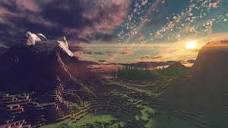
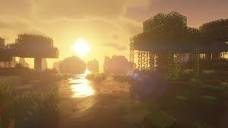
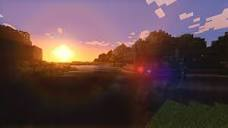

In [177]:
import requests, lxml, re, urllib.parse, base64
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

headers = {
    "User-Agent":
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
}

params = {
    "q": "minecraft shareds photo",
    "sourceid": "chrome",
}

html = requests.get("https://www.google.com/search", params=params, headers=headers)
soup = BeautifulSoup(html.text, 'lxml')

img_urls = []

for result in soup.select('div[jsname=dTDiAc]'):
    link = f"https://www.google.com{result.a['href']}"
    being_used_on = result['data-lpage']
    print(f'Link: {link}\nBeing used on: {being_used_on}\n')

# finding all script (<script>) tags
script_img_tags = soup.find_all('script')

# https://regex101.com/r/L3IZXe/4
img_matches = re.findall(r"s='data:image/jpeg;base64,(.*?)';", str(script_img_tags))

for index, image in enumerate(img_matches):
    try:
        # https://stackoverflow.com/a/6966225/15164646
        img_data = base64.b64decode(str(image))
        img_url = f"data:image/jpeg;base64,{base64.b64encode(img_data).decode('utf-8')}"
        img_urls.append(img_url)
    except:
        pass

print(img_urls)
